In [31]:
import pandas as pd

In [32]:
sims_df = pd.read_csv('export.csv')
sims_df

,Abstract1,Abstract2,similarity
0,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,40.FA.1-s2.0-S1529943020300462-main.pdf,0.192308
1,40.FA.1-s2.0-S1529943020300462-main.pdf,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,0.192308
2,46.B.European_Journal_of_Pain_-_2019_-_Matheve...,48.B.FA.2020.04.01.20049999.full.pdf,0.179775
3,48.B.FA.2020.04.01.20049999.full.pdf,46.B.European_Journal_of_Pain_-_2019_-_Matheve...,0.179775
4,22.B.Spine_Loading_Characteristics_of_Patients...,29.B.ISSLS_Prize_Winner__Smudging_the_Motor_Br...,0.174419
...,...,...,...
185,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,0.042553
186,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,38.B.s00221-016-4625-5.pdf,0.035294
187,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,40.FA.1-s2.0-S1529943020300462-main.pdf,0.034483
188,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,32.7631.full.pdf,0.028169


In [91]:
sims_df2 = pd.read_csv('export_more_ontologies.csv')
sims_df2

,Abstract1,Abstract2,similarity
0,46.B.European_Journal_of_Pain_-_2019_-_Matheve...,52.1-s2.0-S1526590007007298-main.pdf,0.227778
1,52.1-s2.0-S1526590007007298-main.pdf,46.B.European_Journal_of_Pain_-_2019_-_Matheve...,0.227778
2,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,40.FA.1-s2.0-S1529943020300462-main.pdf,0.201550
3,40.FA.1-s2.0-S1529943020300462-main.pdf,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,0.201550
4,20.B.1-s2.0-S0021929020303067-main.pdf,48.B.FA.2020.04.01.20049999.full.pdf,0.200000
...,...,...,...
185,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,33.Disinhibition_of_the_primary_somatosensory_...,0.039409
186,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,38.B.s00221-016-4625-5.pdf,0.033654
187,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,46.B.European_Journal_of_Pain_-_2019_-_Matheve...,0.028986
188,37.The_Journal_of_Physiology_-_2017_-_Roux_-_F...,13.The_Impact_of_Psychosocial_Factors_on_Low_B...,0.028689


In [68]:
import numpy as np
names = set(sims_df['Abstract1'].unique())
A = sims_df.set_index(['Abstract1','Abstract2'])['similarity'].unstack()
A = A.reindex(index=names,columns=names)
for i in range(len(A)):
    for j in range(len(A)):
        if i == j:
            A.iloc[i,j] = 1.
        elif np.isnan(A.iloc[i,j]) and np.isnan(A.iloc[j,i]):
            A.iloc[i,j] = 0
        elif np.isnan(A.iloc[i,j]):
            A.iloc[i,j] = A.iloc[j,i]
        elif np.isnan(A.iloc[j,i]):
            A.iloc[j,i] = A.iloc[i,j]
A

Abstract2,33.Disinhibition_of_the_primary_somatosensory_cortex.13.pdf,26.B.s00421-010-1637-x.pdf,13.The_Impact_of_Psychosocial_Factors_on_Low_Back.19.pdf,22.B.Spine_Loading_Characteristics_of_Patients_With_Low.9.pdf,29.B.ISSLS_Prize_Winner__Smudging_the_Motor_Brain_in.3.pdf,21.B.1-s2.0-S1050641103000415-main.pdf,54.FA.ENEURO.0107-18.2018.full.pdf,44.s13104-020-05356-z.pdf,52.1-s2.0-S1526590007007298-main.pdf,37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf,40.FA.1-s2.0-S1529943020300462-main.pdf,48.B.FA.2020.04.01.20049999.full.pdf,46.B.European_Journal_of_Pain_-_2019_-_Matheve_-_Lumbar_range_of_motion_in_chronic_low_back_pain_is_predicted_by_task‐specific_.pdf,38.B.s00221-016-4625-5.pdf,47.FA.Pain_Related_Fear__Lumbar_Flexion__and_Dynamic_EMG.1.pdf,19.B.1-s2.0-S2468781216300224-main.pdf,32.7631.full.pdf,20.B.1-s2.0-S0021929020303067-main.pdf,51.B.FA.s10865-005-9011-x.pdf
Abstract1,,,,,,,,,,,,,,,,,,,
33.Disinhibition_of_the_primary_somatosensory_cortex.13.pdf,1.000000,0.089552,0.000000,0.000000,0.113636,0.000000,0.000000,0.049383,0.053763,0.045977,0.063636,0.112245,0.063291,0.075949,0.000000,0.000000,0.076923,0.059524,0.000000
26.B.s00421-010-1637-x.pdf,0.089552,1.000000,0.081081,0.000000,0.092105,0.000000,0.000000,0.093750,0.106667,0.000000,0.000000,0.000000,0.112903,0.093750,0.000000,0.109375,0.000000,0.088235,0.094340
13.The_Impact_of_Psychosocial_Factors_on_Low_Back.19.pdf,0.000000,0.081081,1.000000,0.126437,0.117021,0.000000,0.084211,0.135802,0.093750,0.042553,0.192308,0.094340,0.000000,0.000000,0.000000,0.107143,0.000000,0.078652,0.000000
22.B.Spine_Loading_Characteristics_of_Patients_With_Low.9.pdf,0.000000,0.000000,0.126437,1.000000,0.174419,0.153846,0.000000,0.113924,0.074468,0.044444,0.121495,0.142857,0.101266,0.000000,0.065574,0.126582,0.000000,0.000000,0.070423
29.B.ISSLS_Prize_Winner__Smudging_the_Motor_Brain_in.3.pdf,0.113636,0.092105,0.117021,0.174419,1.000000,0.123288,0.000000,0.091954,0.080000,0.052083,0.000000,0.122642,0.000000,0.091954,0.000000,0.129412,0.000000,0.100000,0.000000
21.B.1-s2.0-S1050641103000415-main.pdf,0.000000,0.000000,0.000000,0.153846,0.123288,1.000000,0.000000,0.000000,0.078947,0.000000,0.000000,0.094118,0.079365,0.078125,0.095238,0.076923,0.058824,0.089552,0.075472
54.FA.ENEURO.0107-18.2018.full.pdf,0.000000,0.000000,0.084211,0.000000,0.000000,0.000000,1.000000,0.081395,0.092784,0.000000,0.146789,0.135922,0.121951,0.000000,0.044776,0.080460,0.083333,0.102273,0.094595
44.s13104-020-05356-z.pdf,0.049383,0.093750,0.135802,0.113924,0.091954,0.000000,0.081395,1.000000,0.117647,0.000000,0.163265,0.127660,0.094595,0.000000,0.000000,0.092105,0.063492,0.102564,0.093750
52.1-s2.0-S1526590007007298-main.pdf,0.053763,0.106667,0.093750,0.074468,0.080000,0.078947,0.092784,0.117647,1.000000,0.000000,0.094828,0.112150,0.160494,0.000000,0.000000,0.000000,0.052632,0.087912,0.152778


In [77]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=3, linkage='complete').fit(A.fillna(1.))
print(model.labels_)
results = pd.DataFrame({"cluster": model.labels_},index=A.index)
clusters = results.groupby('cluster').apply(lambda x: list(x.index))
clusters

[0 2 0 2 1 0 2 0 1 0 1 1 0 1 0 0 0 2 0]


cluster
0    [33.Disinhibition_of_the_primary_somatosensory...
1    [29.B.ISSLS_Prize_Winner__Smudging_the_Motor_B...
2    [26.B.s00421-010-1637-x.pdf, 22.B.Spine_Loadin...
dtype: object

In [85]:
",".join([s.split('.')[0] for s in sorted(clusters[0])])

'13,19,21,32,33,37,44,46,47,51'

In [86]:
",".join([s.split('.')[0] for s in sorted(clusters[1])])

'29,38,40,48,52'

In [87]:
",".join([s.split('.')[0] for s in sorted(clusters[2])])

'20,22,26,54'

1) 32,33,37,38; 
2) 13,40,44,51,52,54; 
3) 19,20,21,26,29,46,47,48

In [20]:
sims_df.sort_values(by='similarity',ascending=True).values

array([['37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf',
        '46.B.European_Journal_of_Pain_-_2019_-_Matheve_-_Lumbar_range_of_motion_in_chronic_low_back_pain_is_predicted_by_task‐specific_.pdf',
        0.0235294117647058],
       ['37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf',
        '32.7631.full.pdf', 0.028169014084507],
       ['37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf',
        '40.FA.1-s2.0-S1529943020300462-main.pdf', 0.0344827586206896],
       ['37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf',
        '38.B.s00221-016-4625-5.pdf', 0.0352941176470588],
       ['37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf',
        '

In [19]:
sims_df.sort_values(by='similarity',ascending=False).iloc[0].values

array(['13.The_Impact_of_Psychosocial_Factors_on_Low_Back.19.pdf',
       '40.FA.1-s2.0-S1529943020300462-main.pdf', 0.1923076923076923],
      dtype=object)

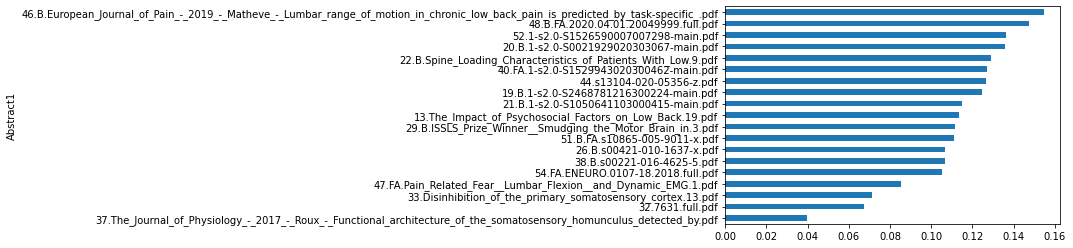

In [92]:
avg_sims2 = sims_df2.groupby('Abstract1')['similarity'].mean().sort_values()
avg_sims2.plot.barh();

In [13]:
avg_sims = sims_df.groupby('Abstract1')['similarity'].mean().sort_values()
avg_sims

Abstract1
37.The_Journal_of_Physiology_-_2017_-_Roux_-_Functional_architecture_of_the_somatosensory_homunculus_detected_by.pdf                   0.043582
32.7631.full.pdf                                                                                                                       0.064474
33.Disinhibition_of_the_primary_somatosensory_cortex.13.pdf                                                                            0.075790
47.FA.Pain_Related_Fear__Lumbar_Flexion__and_Dynamic_EMG.1.pdf                                                                         0.076199
21.B.1-s2.0-S1050641103000415-main.pdf                                                                                                 0.094487
26.B.s00421-010-1637-x.pdf                                                                                                             0.096176
38.B.s00221-016-4625-5.pdf                                                                                                    

<AxesSubplot:ylabel='Abstract1'>

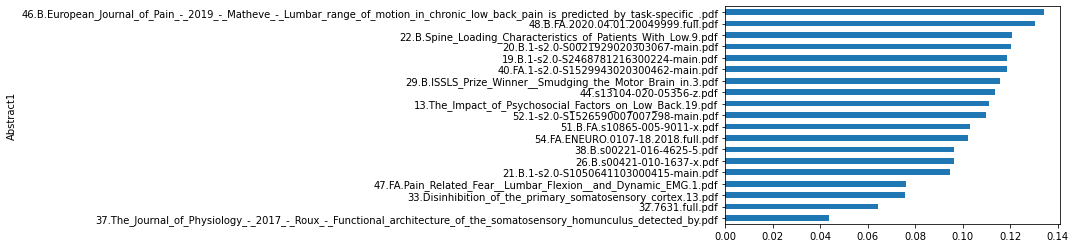

In [14]:
avg_sims = sims_df.groupby('Abstract1')['similarity'].mean().sort_values()
avg_sims.plot.barh()